# Pandas Series

- matplotlib, numpy, **pandas**, seaborn, scikit-learn, stats, scipy, ... 


## Some comparisons

______


- Numpy: Arrays
- Pandas: Series and Dataframes

___________ 

- Series: like a numpy array, but with some additional functionality. 


- Series: Imagine a single column of a table.  

- Dataframes: Imagine the entire table. 

______

How is a series different from a list? 

- Series contains an index, which can be thought of as a row name (often is a row number), which is a way to reference items. The index is stored with other meta-information (information about the series).   

- the elements are of a specific data type. The data type is inferred, but can be manually specified. 

_____ 



## Import Pandas

`import pandas as pd`

In [1]:
import pandas as pd
import numpy as np
from pydataset import data

## Create a Series

1. from a list
2. from a numpy array
3. from a dataframe

**Create a Series from a List**

In [2]:
my_list = [2 ,3, 5]
type(my_list)

list

In a list, you can use an index to access value in list, and those indices are integers representing location. These indices in a list cannot be changed to be a name, datetime, etc. 

In [3]:
my_list[0]

2

*but* if we create a series from the list, similar to how you would convert a list to an array with numpy...

In [5]:
# make list to an array as a refresher
np.array(my_list)

array([2, 3, 5])

we can create a series from the list...

In [7]:
my_series = pd.Series(my_list)
type(my_series)

pandas.core.series.Series

In [ ]:
what's inside the series? 

In [8]:
my_series

0    2
1    3
2    5
dtype: int64

- 3 rows, with the row indices (or row names) as [0, 1, 2]
- the values are [2, 3, 5]
- the datatype is int64 (i.e. will store LARGE integers ;))


**Create a Series from an array**


In [9]:
my_array = np.array([8.0, 13.0, 21.0])

In [10]:
my_series

0    2
1    3
2    5
dtype: int64

- 3 rows, with the row indices as [0, 1, 2]
- the values are [8.0, 13.0, 21.0]
- the datatype is float64

**Create a Series from a dataframe**


In [12]:
my_df = data('sleepstudy')
my_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Create a Series from one column of the dataframe

**option 1: dot column_name**

`my_df.column_name`

In [13]:
my_df.Reaction

1      249.5600
2      258.7047
3      250.8006
4      321.4398
5      356.8519
         ...   
176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, Length: 180, dtype: float64

**option 2: single bracket**


`my_df[column_name]`

In [19]:
my_series = my_df['Reaction']
my_series

1      249.5600
2      258.7047
3      250.8006
4      321.4398
5      356.8519
         ...   
176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, Length: 180, dtype: float64

**What happens when you do a double bracket?**

`my_df[[column_name]]`

In [20]:
my_df[['Reaction']]

,Reaction
1,249.5600
2,258.7047
3,250.8006
4,321.4398
5,356.8519
...,...
176,329.6076
177,334.4818
178,343.2199
179,369.1417


**See first 5 rows**

`my_series.head()`

In [21]:
my_series.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

### Summary

Create series 

...from list, array, dictionary

In [22]:
s1 = pd.Series(my_list)

In [25]:
dic = {'thing1': 1}
s2 = pd.Series(dic)
s2

thing1    1
dtype: int64

...from existing dataframe

In [23]:
my_series

1      249.5600
2      258.7047
3      250.8006
4      321.4398
5      356.8519
         ...   
176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, Length: 180, dtype: float64

## Pandas data types

Data types you will see in series and dataframes: 

- int: integer, whole number values  
- float: decimal numbers  
- bool: true or false values  
- object: strings  
- category: a fixed set of string values  
- a name, an optional human-friendly name for the series  

There are 2 ways a new Series gets its data type...

1. Inference of data type
2. Assignment of data type

_______________________________

1. Inference of data types: when creating the series, Pandas infers the data type based on the data entered. 

In [26]:
pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [27]:
pd.Series(['i', 'love', 'Codeup'])

0         i
1      love
2    Codeup
dtype: object

In [29]:
my_series = pd.Series([1, 3, 'Five'])

In [31]:
my_new_series = my_series[my_series != 'Five']
my_new_series

In [32]:
my_new_series.astype('int')

2. Assignment of data type: Using `astype()` to assign data types

If we try to assign a data type to data that cannot be coerced into that type, we will get an error. 
For example, If we assign the series, my_series, to an integer type, Pandas will return error becuase it can't convert 'five'to an int. 

### Summary

- Pandas will infer datatypes
- You can change datatypes upon creating the series `pd.Series(mylist).astype('int')` or later using "astype(x)" where x can be 'float', 'int', 'str', e.g. `myseries.astype('str')`
- astype('str') will show the series dtype = object. 

_____________________________________
_____________________________________

## Vectorized Operations

Like numpy arrays, pandas series are vectorized by default. E.g., we can easily use the basic arithmetic operators to manipulate every element in the series.

First, let's create 2 series, s1 and s2:

In [33]:
s1 = pd.Series([2, 3, 5, 8])
s1

0    2
1    3
2    5
3    8
dtype: int64

In [34]:
s2 = my_df.Reaction
s2.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

We will now perform arithmetic operations followed by comparison operations...

In [35]:
s1+1

0    3
1    4
2    6
3    9
dtype: int64

In [36]:
s1/2

0    1.0
1    1.5
2    2.5
3    4.0
dtype: float64

Now, comparison operations

In [37]:
s1 >= 5

0    False
1    False
2     True
3     True
dtype: bool

In [39]:
(s1 >= 3) & (s2 % 2 == 0)

0      False
1      False
2      False
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180    False
Length: 181, dtype: bool

### Summary

- Just as in Numpy, we can perform operations on each element in the series by simply applying the series, s + 1, s/2, s == 3, etc. and each will be evaluated. 

- a series is always returned
- a series of booleans if we are giving condition statements. 
- a series of transformed values if we are doing an arithmetic operation. 


_______________________________________________________
_______________________________________________________

## Series Methods

### Methods to get glimpses into the series

`.head()`: returns the 1st 5 rows (max) of the series

In [40]:
s1.head()

0    2
1    3
2    5
3    8
dtype: int64

In [41]:
s2.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

`.tail()`: returns the last 5 rows of the series

In [42]:
s2.tail()

176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, dtype: float64

`.value_counts()`: count number of records/items/rows containing each unique value (think "group by")

```sql
select Days, count(Subject) from my_df group by Days;
```

In [43]:
s3 = my_df.Days
s3.value_counts()

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

### Methods to test whether a value or condition exists in the series

`.any()`: returns a single boolean...do any values in the series meet the condition? 

In [45]:
(s1 > 3).any()

True

`.all()`: returns a single boolean...do all values in the series meet the condition? 

In [46]:
(s1 > 3).all()

False

`.isin()`: comparing string of each item in series to a list of strings. Is the string in your series found in the list of strings? Returns a series of boolean values. 
In other words, use `isin()` to tell whether each value is in a set of known values. 

In [47]:
vowels = list('aeiou')

In [48]:
letters = list('abcdefghijklomnopqrstuvwxyz')

In [49]:
l_series = pd.Series(letters)

In [50]:
l_series.isin(vowels)

In [52]:
l_series.isin(vowels).value_counts()

False    21
True      6
dtype: int64

### Methods for Descriptive statistics

- `count()`
- `sum()`
- `mean()`
- `median()`
- `min()`
- `max()`
- `mode()`
- `abs()`
- `std()`
- `quantile()`

In [53]:
{
    'count' : s2.count(),
    'sum' : s2.sum(),
    'mean' : s2.mean(),
    'quantile' : s2.quantile()

}

{'count': 180,
 'sum': 53731.42049999999,
 'mean': 298.50789166666664,
 'quantile': 288.6508}

In [54]:
s2.describe()

count    180.000000
mean     298.507892
std       56.328757
min      194.332200
25%      255.375825
50%      288.650800
75%      336.752075
max      466.353500
Name: Reaction, dtype: float64

### Applying other functions to each item in a series

1. Define the function: `def myfcn()`
2. Use the .apply method with lambda: `series.apply(lambda n: <myfuction>)`

In [55]:
def even_or_odd(n):
    '''
    this function takes a number and returns a string indicating whether 
    the passed number is even or odd
    '''
    if n % 2 == 0:
        return 'even'
    return 'odd'

In [56]:
s1.apply(even_or_odd)

0    even
1     odd
2     odd
3    even
dtype: object

In [57]:
s1.apply(lambda n: 'even' if n %2 == 0 else 'odd')

0    even
1     odd
2     odd
3    even
dtype: object

### Vectorized String Operations

We could do this...`series.apply(lambda s: s.lower())`, but, why when we have...`series.str.lower()`

Once we access the .str property, we can treat the resulting value as if it were a string. In our case, we called the .lower method, which will convert all the strings in the series to lower case.

In [58]:
s4 = pd.Series(['Madeleine', 'Misty', 'John', 'John', 'Ryan', 'Ryan', 'Adam', 'Adam', 'Margaret'])

In [59]:
#convert all to lowercase

In [60]:
s4.str.lower()

0    madeleine
1        misty
2         john
3         john
4         ryan
5         ryan
6         adam
7         adam
8     margaret
dtype: object

In [61]:
s4 = s4.str.replace('rgaret','ggie')

In [62]:
s4

0    Madeleine
1        Misty
2         John
3         John
4         Ryan
5         Ryan
6         Adam
7         Adam
8       Maggie
dtype: object

### Summary

Methods look like functions, but you can tell they are methods because they start with the series variable name followed by the .method_name(), such as my_series.count(). Whereas pandas functions will begin with pd.concat(s1, s2). 

We talked about 

1. Methods to get glimpses into the series

2. Methods to test whether a value or condition exists in the series

3. Methods for Descriptive statistics

4. Methods for Applying other functions to each item in a series

5. Vectorized String Operations

__________________________________________
__________________________________________


## Subsetting & Indexing

In [64]:
s2.describe()['75%']

336.752075

Find the 75th percentile

In [69]:
q3 = s2.describe()['75%']

Find all where response time is > 3rd quartile, using the identified the cutoff for 3rd to 4th quartile. 

In [70]:
s2[s2 > q3].head()

5     356.8519
6     414.6901
7     382.2038
9     430.5853
10    466.3535
Name: Reaction, dtype: float64

Create a new series that contains labels of 'q4' if the value is above the 3rd q, or 'q1-q3' if not. 

In [71]:
s2.apply(lambda n: 'q4' if n > q3 else 'q1-q3')

1      q1-q3
2      q1-q3
3      q1-q3
4      q1-q3
5         q4
       ...  
176    q1-q3
177    q1-q3
178       q4
179       q4
180       q4
Name: Reaction, Length: 180, dtype: object

Filter our letters series 

In [74]:
l_series[l_series.isin(vowels)]

0     a
4     e
8     i
12    o
15    o
21    u
dtype: object

## Numerical to Categorical Values - Binning & Cutting

`cut()` put numerical values into discrete bins. 

We can let pandas create bins of even intervals, or we can specify the bins to create. 

In [75]:
s2_minutes = s2/60

In [76]:
s2_bins = pd.cut(s2_minutes, 4)
s2_bins

1      (3.234, 4.372]
2      (3.234, 4.372]
3      (3.234, 4.372]
4      (4.372, 5.506]
5      (5.506, 6.639]
            ...      
176    (4.372, 5.506]
177    (5.506, 6.639]
178    (5.506, 6.639]
179    (5.506, 6.639]
180    (5.506, 6.639]
Name: Reaction, Length: 180, dtype: category
Categories (4, interval[float64, right]): [(3.234, 4.372] < (4.372, 5.506] < (5.506, 6.639] < (6.639, 7.773]]

In [77]:
s2_bins.value_counts()

(4.372, 5.506]    75
(3.234, 4.372]    53
(5.506, 6.639]    44
(6.639, 7.773]     8
Name: Reaction, dtype: int64

## Plotting

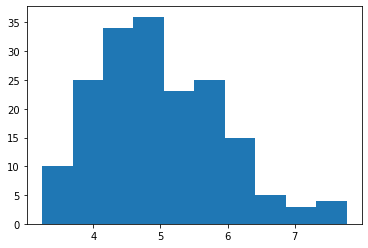

In [78]:
import matplotlib.pyplot as plt
plt.hist(s2_minutes)
plt.show()

In [90]:
s2_bins = pd.cut(s2_minutes, 10)

thing = s2_bins.value_counts(sort=False)

<AxesSubplot:>

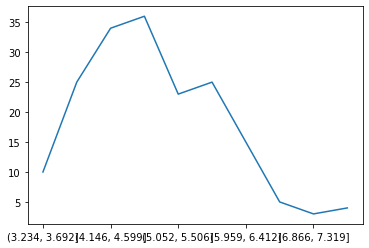

In [91]:
#plots bins of s2 minutes
thing.plot()

<AxesSubplot:>

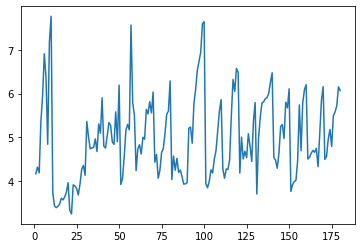

In [92]:
#plots each data point in s2 minutes
s2_minutes.plot()

<AxesSubplot:ylabel='Frequency'>

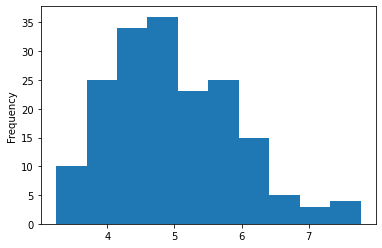

In [93]:
s2_minutes.plot.hist()

Text(0.5, 1.0, 's2 minutes')

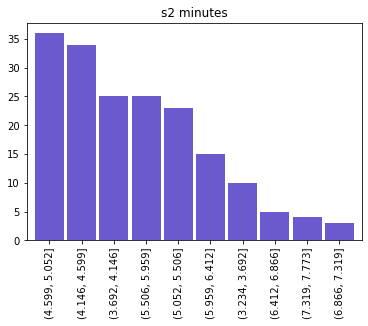

In [96]:
s2_bins.value_counts().plot.bar(color='slateblue', width=.9)
plt.title('s2 minutes')